In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### drift in wheel odometry

In [5]:
data_dir = "./data"
ground_truth = pd.read_csv(data_dir + "/ground_truth.csv")
actual_traj = np.array(ground_truth[['x','y']])
wheel_enc = np.array(pd.read_csv(data_dir + "/wheel_control.csv")[['v','w']])
only_lidar = np.array(pd.read_csv(data_dir + '/lidar_poses.csv')[['pose_x','pose_y','pose_t']])

FileNotFoundError: ignored

In [2]:
def simulate_vehicle(pose, v, w, dt=0.01):
    x, y, theta = pose
    new_theta = theta + w*dt
#     new_theta = np.arctan2(np.sin(new_theta), np.cos(new_theta))
    return x+v*np.cos(theta)*dt, y+v*np.sin(theta)*dt, new_theta

In [3]:
wheel_enc_traj = []
pose = np.array(ground_truth[['x','y','theta']])[0]
for v, w in wheel_enc:
    wheel_enc_traj.append(pose[:2])
    pose = simulate_vehicle(pose, v, w)
wheel_enc_traj = np.array(wheel_enc_traj)

NameError: ignored

In [ ]:
end = 10000
plt.figure()
plt.grid()
plt.plot(actual_traj[:,0], actual_traj[:,1], label='Actual Vehicle path')
plt.plot(wheel_enc_traj[:end,0], wheel_enc_traj[:end,1], '.', label='Vehicle path from wheel encoder')
plt.legend()

In [ ]:
start = 0
end = 500
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(14, 6)
axes[0].plot(wheel_enc_traj[:end*10,0], wheel_enc_traj[:end*10,1], 'k-')
axes[0].set_title('Wheel encoder')
axes[1].plot(only_lidar[:end,0], only_lidar[:end,1], 'b-')
axes[1].set_title('Lidar')
axes[2].plot(actual_traj[:end,0], actual_traj[:end,1],'r-')
axes[2].set_title('Fused pose')
axes[0].grid()
axes[1].grid()
axes[2].grid()

### Effect of ANgular error in pose estimate

In [ ]:
x0, y0 = 0, 0
x1, y1 = 0, 100
x2, y2 = -np.tan(np.deg2rad(2))*100, 100

<IPython.core.display.Javascript object>


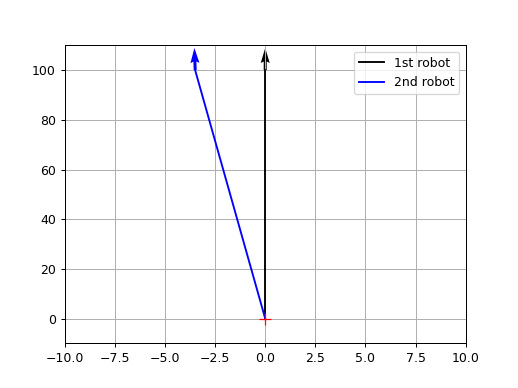

In [ ]:
plt.figure()
plt.xlim(-10, 10)
plt.ylim(-10, 110)
plt.grid()
plt.plot((x0,x1), (y0, y1),'k-',label='1st robot')
plt.plot((x0,x2), (y0, y2),'b-',label='2nd robot')
plt.plot(0, 0, 'r+', ms=10)
plt.quiver(x2, y2, np.cos(np.deg2rad(92)), np.sin(np.deg2rad(92)), color='blue')
plt.quiver(x1, y1, np.cos(np.deg2rad(90)), np.sin(np.deg2rad(90)))
plt.legend()